In [8]:
# 1. Imports
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

df = pd.read_csv("data/cleaned_telco.csv")  # or cleaned_telco_data.csv if that's the latest
df.head()

# 3. Split
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# 4. Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

# 6. Save model
joblib.dump(model, "../outputs/model.pkl")


ValueError: could not convert string to float: 'Female'

In [5]:
from sklearn.preprocessing import LabelEncoder

# Make a copy to avoid changing original
df_encoded = df.copy()

# Encode all object (string) columns
label_encoders = {}
for column in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le


In [6]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


In [7]:
print(X_train.dtypes)  # should show all numeric (int64 or float64)


customerID            int64
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges          int64
dtype: object


In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


NameError: name 'y_pred' is not defined

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df[features]
y = df['Churn'].map({'No':0, 'Yes':1})  # example binary encode target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)  # <- This step must be done before metrics


NameError: name 'features' is not defined

In [11]:
# Define features list
features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Convert TotalCharges to numeric and clean missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=features + ['Churn'], inplace=True)

# Encode target variable
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Prepare X and y
X = df[features]
y = df['Churn']

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7540867093105899

Confusion Matrix:
 [[900 133]
 [213 161]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84      1033
           1       0.55      0.43      0.48       374

    accuracy                           0.75      1407
   macro avg       0.68      0.65      0.66      1407
weighted avg       0.74      0.75      0.74      1407



In [12]:
import matplotlib.pyplot as plt
import pandas as pd

importances = model.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot top 10
feat_imp_df.head(10).plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances")
plt.show()


AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

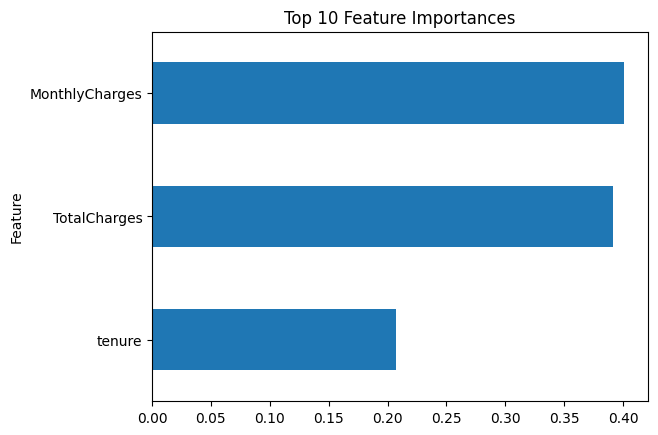

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming clf is your trained RandomForestClassifier
importances = clf.feature_importances_
feature_names = X.columns

feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot top 10 feature importances
feat_imp_df.head(10).plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances")
plt.show()


In [14]:
import joblib

# Assuming your model variable is named 'model' (e.g., RandomForestClassifier)
joblib.dump(model, 'churn_rf_model.pkl')

# Assuming you have a dictionary of label encoders for categorical columns
joblib.dump(label_encoders, 'label_encoders.pkl')


['label_encoders.pkl']

In [15]:
import joblib
import pandas as pd

# Load saved model and encoders
model = joblib.load('churn_rf_model.pkl')
label_encoders = joblib.load('label_encoders.pkl')

# Example new user input (must match your training features!)
user_input = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    # ... add all required features
}

# Encode categorical inputs the same way as training
for col, encoder in label_encoders.items():
    if col in user_input:
        user_input[col] = encoder.transform([user_input[col]])[0]

# Convert to DataFrame (shape: 1 row, n features)
input_df = pd.DataFrame([user_input])

# Predict churn (returns array of 0/1 or class labels)
prediction = model.predict(input_df)

print("Predicted churn:", prediction[0])


AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

In [16]:
import joblib
import pandas as pd

# Load label encoders dictionary
label_encoders = joblib.load('label_encoders.pkl')

# Example new user input with categorical features
user_input = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    # ... other features ...
}

# Encode categorical features using loaded encoders
for col, encoder in label_encoders.items():
    if col in user_input:
        user_input[col] = encoder.transform([user_input[col]])[0]

# Convert to DataFrame
input_df = pd.DataFrame([user_input])

# Now you can pass input_df to your loaded model for prediction
